Just starting a notebook to explore some of the MovieLens data before the official data release.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline
import seaborn as sns
import pandas as pd
import sys, os
from pathlib import Path

#plt.rc('text', usetex=True)
sns.set_style("ticks")
sns.set_context("paper",font_scale=2.0)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'serif', 'serif': ['Gentium'], 'size': 10}
plt.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Gentium'
matplotlib.rcParams['mathtext.it'] = 'Gentium:italic'
matplotlib.rcParams['mathtext.bf'] = 'Gentium:bold'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

pgf_with_custom_preamble = {
"font.family": "serif", # use serif/main font for text elements
"text.usetex": False,    # use inline math for ticks
"pgf.preamble": [
    "\\usepackage{mathpazo}",
    "\\usepackage{gentium}",
    "\\DeclareSymbolFont{sfnumbers}{T1}{gentium}{m}{n}",
    "\\SetSymbolFont{sfnumbers}{bold}{T1}{gentium}{bx}{n}",
    "\\DeclareMathSymbol{0}\mathalpha{sfnumbers}{\"30}",
    "\\DeclareMathSymbol{1}\mathalpha{sfnumbers}{\"31}",
    "\\DeclareMathSymbol{2}\mathalpha{sfnumbers}{\"32}",
    "\\DeclareMathSymbol{3}\mathalpha{sfnumbers}{\"33}",
    "\\DeclareMathSymbol{4}\mathalpha{sfnumbers}{\"34}",
    "\\DeclareMathSymbol{5}\mathalpha{sfnumbers}{\"35}",
    "\\DeclareMathSymbol{6}\mathalpha{sfnumbers}{\"36}",
    "\\DeclareMathSymbol{7}\mathalpha{sfnumbers}{\"37}",
    "\\DeclareMathSymbol{8}\mathalpha{sfnumbers}{\"38}",
    "\\DeclareMathSymbol{9}\mathalpha{sfnumbers}{\"39}",
    "\\DeclareMathSymbol{,}\mathalpha{sfnumbers}{\"2C}"
    ]
}
matplotlib.rcParams.update(pgf_with_custom_preamble)

In [3]:
data_dir = Path('../data/')
ml_dir = data_dir / 'movie_lense'
netflix_dir = data_dir / 'netflix'

In [10]:
# Cross-validation suggested to look at http://lenskit.org

In [11]:
# Intro to recommendation systems:
# https://www.kaggle.com/kanncaa1/recommendation-systems-tutorial

# This makes a pivot table between users and movies, with values corresponding to rating
# Can recommend by correlating the column of one movie with all other movies to find the most
# similar movies in terms of ratings by people in order to make a recommendation algorithm.

In [106]:
movies = pd.read_csv(ml_dir / 'movies.csv')
movies.head()
# movieId, title, and genres

# Movies can be accessed using their movieId
# https://movielens.org/movies/movieId
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
# Will also want to separate the dates out; could just remove that small fraction of the movies that we
# do not have dates for

In [107]:
movies.describe()
# 58k movies since 1995

# It's possible that some of these movies are actually duplicates, since some titles may be entered manually

,movieId
count,58098.000000
mean,111919.516197
std,59862.660956
min,1.000000
25%,72437.750000
50%,126549.000000
75%,161449.500000
max,193886.000000


In [108]:
# Let's see if we can extract dates from each movie and see what the time range they cover is
movies['year'] = movies['title'].apply(lambda x: x.split('(')[-1].split(')')[0])
#movies['year'] = pd.to_datetime(movies['year'], format='%Y')
#movies['year'].unique() #.shape # That isn't going to cut it

# This won't actually work because ~400 of the 58k movies don't actually have dates, so we would need to get the
# information from somewhere else

In [91]:
ratings = pd.read_csv(ml_dir / 'ratings.csv')
ratings.head()
#userId, movieId, rating, timestamp

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [92]:
ratings.describe()
# 25m reviews, which include timestamp (time series) and ratings

,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


In [93]:
ratings['userId'].unique().shape # 283k unique users!!

(283228,)

In [94]:
ratings['movieId'].unique().shape # ~54k unique movies
# This would be a really large matrix

# Could we reduce down to the 

(53889,)

In [95]:
# Could convert the review timestamps to datetime and look at their frequency
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

Text(0.5, 0, 'Year')

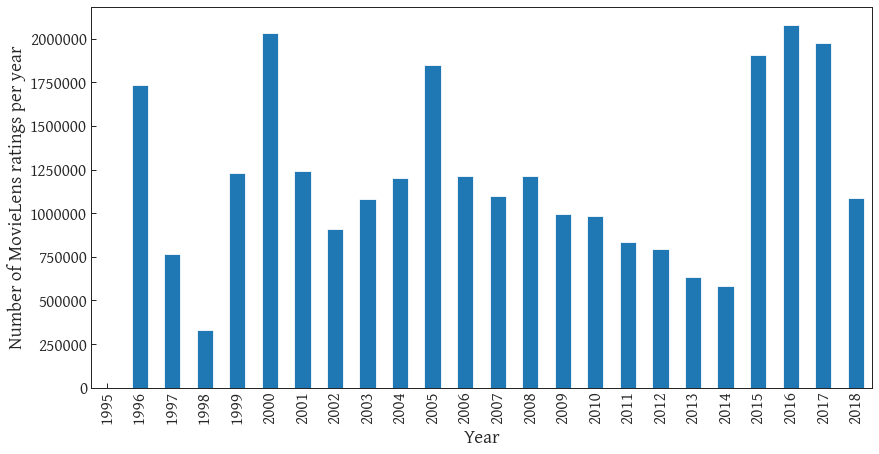

In [20]:
fig = plt.figure(figsize=(14,7))
ratings.groupby(ratings["timestamp"].dt.year)['timestamp'].count().plot(kind="bar")
plt.ylabel(r'Number of MovieLens ratings per year')
plt.xlabel(r'Year')

Text(0.5, 0, '$\\log_{10}($Number of reviews per user$)$')

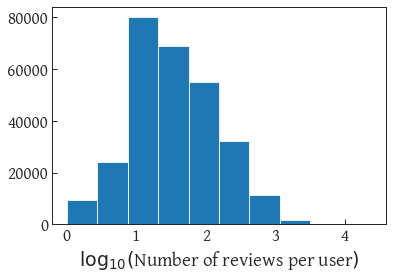

In [21]:
# What is the distribution of number of reviews each unique user gives?
plt.hist(np.log10(ratings.groupby('userId').count()['movieId']))
plt.xlabel(r'$\log_{10}($Number of reviews per user$)$')

3.5304452124932677 3.5


Text(0.5, 0, 'User mean rating')

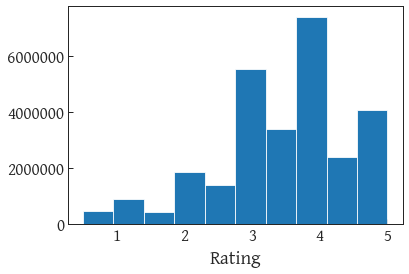

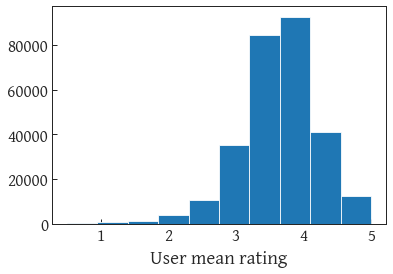

In [22]:
# Look at distribution of review values
fig = plt.figure()
plt.hist(ratings['rating'])
plt.xlabel(r'Rating')
print(np.mean(ratings['rating']), np.median(ratings['rating']))
# Mean rating is 3.53 and median is 3.5

# Then look at median review as a function of user
fig = plt.figure()
plt.hist(ratings.groupby('userId').mean()['rating'])
plt.xlabel(r'User mean rating')

In [23]:
# How sparse is our recommendation matrix?
len(ratings) / (ratings['userId'].unique().shape[0] * ratings['movieId'].unique().shape[0])

# Very, very sparse. 0.2% of user*movie matrix is filled

0.0018183629478993135

In [24]:
links = pd.read_csv(ml_dir / 'links.csv')
links.head()
#movieId, imdbId, tmdbId

# links to each, imdb, movielens, and themoviedb
#http://www.imdb.com/title/tt0114709/ for toy story
#https://www.themoviedb.org/movie/862

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [25]:
links.describe()

,movieId,imdbId,tmdbId
count,58098.000000,5.809800e+04,57917.000000
mean,111919.516197,1.192737e+06,133501.495761
std,59862.660956,1.701589e+06,133007.815686
min,1.000000,1.000000e+00,2.000000
25%,72437.750000,8.050625e+04,32194.000000
50%,126549.000000,2.905645e+05,77269.000000
75%,161449.500000,1.724964e+06,209231.000000
max,193886.000000,9.038520e+06,549443.000000


In [26]:
tags = pd.read_csv(ml_dir / 'tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [27]:
tags.describe()

,userId,movieId,timestamp
count,1.108997e+06,1.108997e+06,1.108997e+06
mean,1.248016e+05,5.492109e+04,1.413544e+09
std,7.726964e+04,5.618123e+04,1.144358e+08
min,1.400000e+01,1.000000e+00,1.135429e+09
25%,7.340600e+04,3.362000e+03,1.323903e+09
50%,1.030130e+05,4.374400e+04,1.446994e+09
75%,1.883600e+05,9.682100e+04,1.525549e+09
max,2.832210e+05,1.938680e+05,1.537945e+09


In [28]:
tags['tag'].unique().shape # 73k unique tags

(74715,)

In [29]:
# This is a dense matrix
# Every movie has a relevance score for every tag
# There are 1128 tags
# 

genome_scores = pd.read_csv(ml_dir / 'genome-scores.csv')
genome_scores.head()

# Could make a pivot table or something out of this

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000


In [30]:
genome_scores.describe()

,movieId,tagId,relevance
count,1.486253e+07,1.486253e+07,1.486253e+07
mean,3.997087e+04,5.645000e+02,1.153631e-01
std,4.814930e+04,3.256254e+02,1.554320e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,3.680750e+03,2.827500e+02,2.300000e-02
50%,7.880000e+03,5.645000e+02,5.450000e-02
75%,7.124900e+04,8.462500e+02,1.390000e-01
max,1.875950e+05,1.128000e+03,1.000000e+00


In [31]:
genome_tags = pd.read_csv(ml_dir / 'genome-tags.csv')
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [32]:
genome_tags.describe()

,tagId
count,1128.000000
mean,564.500000
std,325.769857
min,1.000000
25%,282.750000
50%,564.500000
75%,846.250000
max,1128.000000


In [33]:
len(genome_scores) / len(genome_tags)

# Seems there are genome computations for 13k of the movies

13176.0

In [34]:
# Here is a nice basic EDA on the oscar data
# https://www.kaggle.com/yli864/visualization-and-analysis-of-oscar-data-by-python
# https://www.kaggle.com/carrie1/oscars-outliers

In [35]:
# Let's look at the Oscar data
oscars = pd.read_csv(data_dir / 'the_oscar_award.csv')
oscars.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [36]:
oscars.describe()

,year_film,year_ceremony,ceremony
count,10395.000000,10395.000000,10395.000000
mean,1974.474555,1975.474555,47.500144
std,26.145642,26.145642,26.102352
min,1927.000000,1928.000000,1.000000
25%,1951.000000,1952.000000,24.000000
50%,1974.000000,1975.000000,47.000000
75%,1998.000000,1999.000000,71.000000
max,2019.000000,2020.000000,92.000000


In [37]:
oscars['category'].unique().shape

(111,)

In [38]:
oscars['winner'].value_counts() # roughly 80% lose

False    8038
True     2357
Name: winner, dtype: int64

In [39]:
industry = pd.read_csv(data_dir / 'movie_industry.csv', encoding='latin1')
industry['released'] = pd.to_datetime(industry.released)
industry.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


Text(0.5, 0, '$\\log_{10}($Gross Box Office$)$')

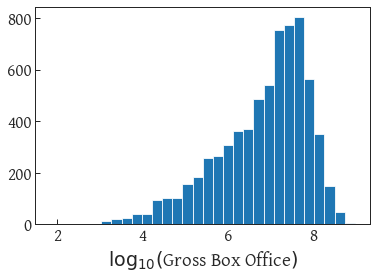

In [40]:
plt.hist(np.log10(industry['gross']), bins=30);
plt.xlabel(r'$\log_{10}($Gross Box Office$)$')

In [41]:
industry.groupby(industry["released"].dt.year)['released']

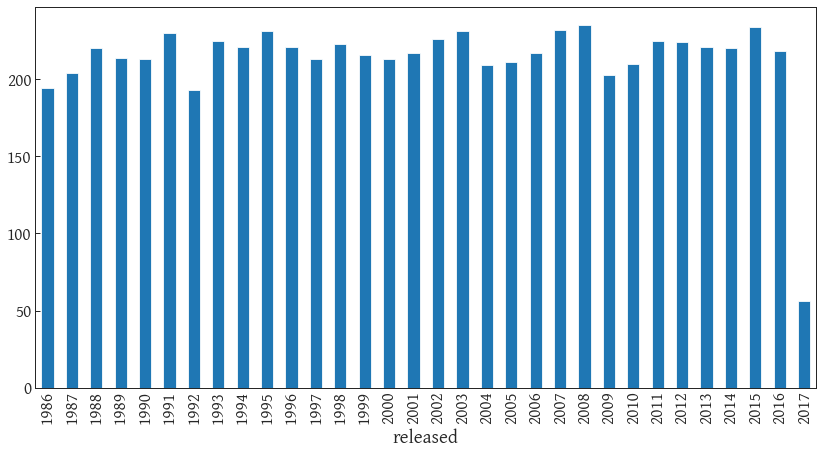

In [42]:
fig = plt.figure(figsize=(14,7))
industry.groupby(industry["released"].dt.year)['released'].count().plot(kind="bar")

# Data cut off in 2017
# Looks like a reasonably consistent number of movies per year with data

In [43]:
# Hard part might involve connecting data between all of these different datasets for a particular movie..

In [44]:
# Movie industry was explored with a cluster analyzer here:
# https://www.kaggle.com/ffisegydd/cluster-analysis-of-movies-data

## Main EDA plot for EDA section

In [176]:
ratings = pd.read_csv(ml_dir / 'ratings.csv')

In [177]:
pl1 = np.log10(ratings.groupby('userId').count()['movieId'])
pl2 = np.log10(ratings.groupby('movieId').count()['userId'])
pl3 = ratings.groupby('userId').mean()['rating']
pl4 = ratings.groupby('movieId').mean()['rating']
pl5 = ratings.groupby('userId').var()['rating']
pl6 = ratings.groupby('movieId').var()['rating']

In [254]:
print(np.mean(pl1))
print(np.mean(pl2))
print(np.mean(pl3))
print(np.mean(pl4))
print(np.mean(pl5))
print(np.mean(pl6))

1.5471856269197604
1.1130914573167738
3.635359243895737
3.0685927253973246
0.9755837980221287
1.048981058025191


In [256]:
10**np.max(pl2)

97999.00000000004

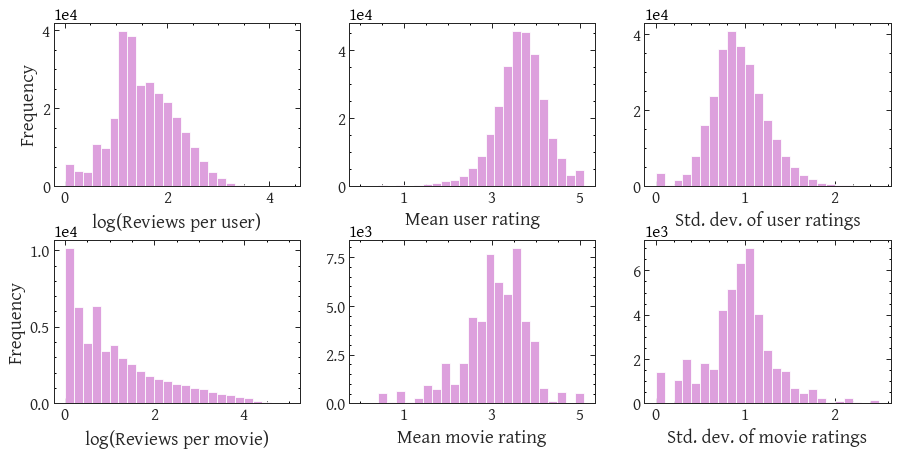

In [182]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,7), gridspec_kw={'hspace':0.33} )
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].yaxis.set_ticks_position('both')
        ax[i,j].xaxis.set_ticks_position('both')
        ax[i,j].tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
        ax[i,j].xaxis.set_minor_locator(AutoMinorLocator())
        ax[i,j].yaxis.set_minor_locator(AutoMinorLocator())
        ax[i,j].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax[0,0].set_ylabel(r'Frequency')
ax[1,0].set_ylabel(r'Frequency')
        
c = 'plum'
        
# reviews per user
ax[0,0].hist(pl1, bins=25, color=c)
ax[0,0].set_xlabel(r'$\log($Reviews per user$)$')        

# reviews per movie
ax[1,0].hist(pl2, bins=25, color=c)
ax[1,0].set_xlabel(r'$\log($Reviews per movie$)$')

# Mean user rating
ax[0,1].hist(pl3, bins=25, color=c, range=(0,5.1))
ax[0,1].set_xlabel(r'Mean user rating')
ax[0,1].set_xticks((1,3,5))

# Mean movie rating
ax[1,1].hist(pl4, bins=25, color=c, range=(0,5.1))
ax[1,1].set_xlabel(r'Mean movie rating')
ax[1,1].set_xticks((1,3,5))

ax[0,2].hist(np.sqrt(pl5), bins=25, color=c, range=(0,2.5))
ax[0,2].set_xlabel(r'Std. dev. of user ratings')

ax[1,2].hist(np.sqrt(pl6), bins=25, color=c, range=(0,2.5))
ax[1,2].set_xlabel(r'Std. dev. of movie ratings')

plt.savefig('movielens_eda1.eps')

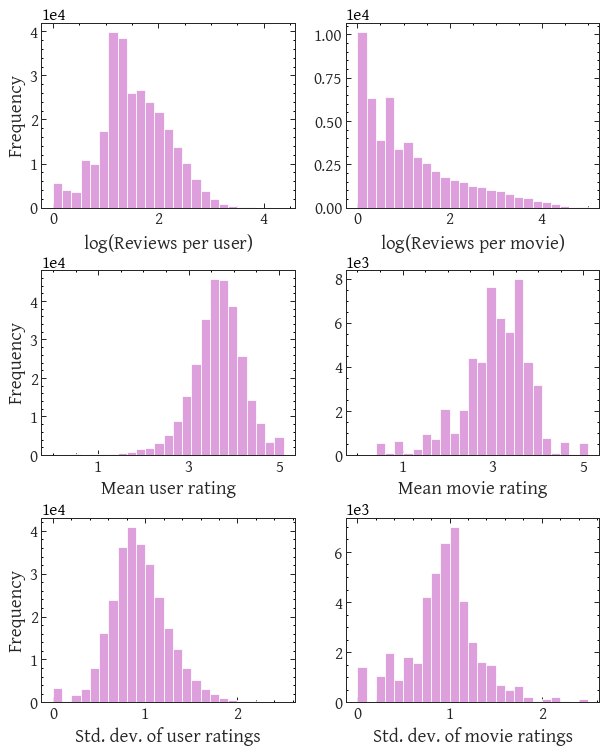

In [191]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(10, 12.5), gridspec_kw={'hspace':0.34} )
for i in range(0,3):
    for j in range(0,2):
        ax[i,j].yaxis.set_ticks_position('both')
        ax[i,j].xaxis.set_ticks_position('both')
        ax[i,j].tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
        ax[i,j].xaxis.set_minor_locator(AutoMinorLocator())
        ax[i,j].yaxis.set_minor_locator(AutoMinorLocator())
        ax[i,j].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax[0,0].set_ylabel(r'Frequency')
ax[1,0].set_ylabel(r'Frequency')
ax[2,0].set_ylabel(r'Frequency')
        
c = 'plum'
        
# reviews per user
ax[0,0].hist(pl1, bins=25, color=c)
ax[0,0].set_xlabel(r'$\log($Reviews per user$)$')        

# reviews per movie
ax[0,1].hist(pl2, bins=25, color=c)
ax[0,1].set_xlabel(r'$\log($Reviews per movie$)$')

# Mean user rating
ax[1,0].hist(pl3, bins=25, color=c, range=(0,5.1))
ax[1,0].set_xlabel(r'Mean user rating')
ax[1,0].set_xticks((1,3,5))

# Mean movie rating
ax[1,1].hist(pl4, bins=25, color=c, range=(0,5.1))
ax[1,1].set_xlabel(r'Mean movie rating')
ax[1,1].set_xticks((1,3,5))

ax[2,0].hist(np.sqrt(pl5), bins=25, color=c, range=(0,2.5))
ax[2,0].set_xlabel(r'Std. dev. of user ratings')

ax[2,1].hist(np.sqrt(pl6), bins=25, color=c, range=(0,2.5))
ax[2,1].set_xlabel(r'Std. dev. of movie ratings')

plt.savefig('movielens_eda1_flip.eps')

## Netflix

In [ ]:
# Data runs from 1998 to 2005
# Will look at this in the morning.

## List of things to explore:

1. Is there seasonality in the ratings? Are people more critical of movies at certain times of the year?
2. Are movie critic ratings trending in a particular way over time?
3. Are movie age ratings trending in any way over time?

Notes from Tuesday meeting:

Brainstorming ideas for our hypothesis to explore.

Suggested sample questions:
1. Explore MovieLens vs. Netflix
2. Explore whether ratings are predictive of awards, and see if ratings change after awards given
3. How does variance within a user's ratings affect model accuracy?

Business questions at stake:
Subscription service vs. movie producers

Daming ideas:

High-level ideas: study how the consumers preferences/tastes evolve with time

Break down movies by genre, look at mean rating of each type of movie and how it evolves with time. How do these types interact with each other?

Are there genres that receive consistently higher or consistently lower ratings? Would allow us to forecast which types of movies would be popular so that we could suggest the film industry to invest in particular types of movies.

Daming second idea:

Demographic data in old MovieLens. Some movies have more variance in ratings; does this have anything to do with demographics?

What sorts of features influence that ratings of movies? 

Clustering on the movie genome, then do dimensionality reduction and see how the reviews correlate with the principle components?


My idea: political trend in ratings?


Grant idea:
Cluster users by type of movie they like
Identify main clusters of users
Building movies that develop cult followings

Reference the fact that many people choose a subscription service is because of a couple shows

What are people spending the most time watching?

Youyuan:
Prediction system for movie makers (rather than consumers)
Company, name of directory, budget, movie type, system can predict total revenue and probability to win an Oscar

Two questions:
Traditional movies and where they are headed, predict where genres are going and what movie production should be doing

Other half would be focused on the streaming market

Things:

1. Time series of ratings by genre
2. Prediction system for movie makers
3. PCA on the movie genome data as features
4. Clustering movies or clustering users
3. Clustering on the movies, use that to cluster users

## Evolution of ratings after movie is released

In [4]:
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import adfuller

In [5]:
import time

movies = pd.read_csv("../data/movie_lense/movies.csv")
ratings = pd.read_csv("../data/movie_lense/ratings.csv")
movies['year'] = movies['title'].apply(lambda x: x.split('(')[-1].split(')')[0])

In [6]:
movies_cleaned = pd.DataFrame(movies.genres.str.split("|").tolist(), index=movies.movieId)
movies_cleaned.head()

,0,1,2,3,4,5,6,7,8,9
movieId,,,,,,,,,,
1,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
2,Adventure,Children,Fantasy,None,None,None,None,None,None,None
3,Comedy,Romance,None,None,None,None,None,None,None,None
4,Comedy,Drama,Romance,None,None,None,None,None,None,None
5,Comedy,None,None,None,None,None,None,None,None,None


In [7]:
movies_cleaned2 = movies_cleaned.stack().reset_index()
movies_cleaned2.head(10)

,movieId,level_1,0
0,1,0,Adventure
1,1,1,Animation
2,1,2,Children
3,1,3,Comedy
4,1,4,Fantasy
5,2,0,Adventure
6,2,1,Children
7,2,2,Fantasy
8,3,0,Comedy
9,3,1,Romance


In [8]:
movies_genres = movies_cleaned2.drop("level_1", axis=1).rename(columns={0:"genres"})
movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [9]:
movies = pd.merge(movies.drop("genres",axis=1), movies_genres)
movies.head(10)

,movieId,title,year,genres
0,1,Toy Story (1995),1995,Adventure
1,1,Toy Story (1995),1995,Animation
2,1,Toy Story (1995),1995,Children
3,1,Toy Story (1995),1995,Comedy
4,1,Toy Story (1995),1995,Fantasy
5,2,Jumanji (1995),1995,Adventure
6,2,Jumanji (1995),1995,Children
7,2,Jumanji (1995),1995,Fantasy
8,3,Grumpier Old Men (1995),1995,Comedy
9,3,Grumpier Old Men (1995),1995,Romance


In [10]:
ratings["rating_date"] = ratings["timestamp"].apply(lambda x: time.strftime('%Y-%m', time.localtime(x)))
ratings["rating_year"] = ratings["timestamp"].apply(lambda x:  time.strftime('%Y', time.localtime(x)))
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [11]:
movie_ratings = ratings.merge(movies.drop("title", axis=1), on="movieId", how="inner")

In [238]:
movie_ratings.head()

,userId,movieId,rating,timestamp,rating_date,rating_year,year,genres
0,1,307,3.5,2009-10-27 21:00:21,2009-10,2009,1993,Drama
1,6,307,4.0,1996-05-14 07:34:08,1996-05,1996,1993,Drama
2,56,307,4.0,2013-11-05 04:28:48,2013-11,2013,1993,Drama
3,71,307,5.0,2009-11-09 19:36:54,2009-11,2009,1993,Drama
4,84,307,3.0,2001-08-29 03:25:19,2001-08,2001,1993,Drama


In [239]:
movie_ratings.shape

(75198276, 8)

In [240]:
first_rating_times = movie_ratings.groupby('movieId').apply(lambda x: x.sort_values('timestamp').iloc[0]['timestamp'])

(array([ 1508.,  1369.,  2186.,  2814.,  1368.,  1990.,  5425.,  5311.,
        14766., 17152.]),
 array([728302.49078704, 729168.55076042, 730034.6107338 , 730900.67070718,
        731766.73068056, 732632.79065394, 733498.85062731, 734364.91060069,
        735230.97057407, 736097.03054745, 736963.09052083]),
 <a list of 10 Patch objects>)

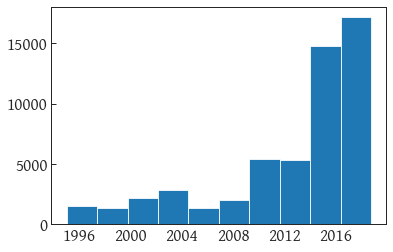

In [241]:
plt.hist(first_rating_times) # This should look the same

In [242]:
movieIds_2000p = movies.where(movies['year'].isin([str(i) for i in range(2000, 2020)])).dropna()['movieId'].unique()
# This is the list of all movies with release of 2000 or greater

In [243]:
def sub_timestamp(x):
    y = x.sort_values('timestamp')
    y['time_since_first_review'] = y['timestamp'] - y.iloc[0]['timestamp']
    return y

In [244]:
ratings_timesince = movie_ratings.groupby('movieId').apply(sub_timestamp)

In [245]:
# select for only the movies that have come out since 2000
ratings_timesince = ratings_timesince.iloc[ratings_timesince.index.get_level_values(0).isin(movieIds_2000p)]

In [246]:
ratings_timesince['months_since_first_review'] = (ratings_timesince['time_since_first_review'] / 30).dt.days.astype(int)

In [247]:
ratings_timesince['years_since_first_review'] = (ratings_timesince['time_since_first_review'] / 365).dt.days.astype(int)

In [250]:
res = ratings_timesince.groupby(['genres', 'months_since_first_review']).apply(lambda x: np.mean(x['rating']))

In [255]:
res.index.get_level_values(0).unique()

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object', name='genres')

In [259]:
res.where(res.index.get_level_values(0) == 'Action').dropna().values

array([3.47496059, 3.52227326, 3.48712229, 3.47939196, 3.45382934,
       3.43432195, 3.43227671, 3.45393198, 3.47607882, 3.47804493,
       3.47299417, 3.48732145, 3.48509561, 3.49970998, 3.49486755,
       3.51349473, 3.48212264, 3.50443724, 3.47851913, 3.47560054,
       3.4735581 , 3.47042511, 3.46657512, 3.48941118, 3.47730666,
       3.48528498, 3.49331624, 3.48876425, 3.48715928, 3.48696418,
       3.47604218, 3.48143982, 3.47810819, 3.47594428, 3.47781032,
       3.49585323, 3.48946912, 3.48576897, 3.49413981, 3.48496491,
       3.4753898 , 3.47908627, 3.45625162, 3.46026816, 3.43843591,
       3.44311509, 3.44355913, 3.46135717, 3.46202011, 3.4698861 ,
       3.45850356, 3.44853779, 3.46402862, 3.4325897 , 3.44393374,
       3.44724516, 3.43274653, 3.42223666, 3.43695577, 3.43647921,
       3.44838087, 3.47685388, 3.47164513, 3.47368557, 3.53587511,
       3.47195792, 3.47298436, 3.4619809 , 3.46693462, 3.4451707 ,
       3.48082047, 3.48664328, 3.47615329, 3.47046808, 3.46855

Text(0, 0.5, 'Mean review in month')

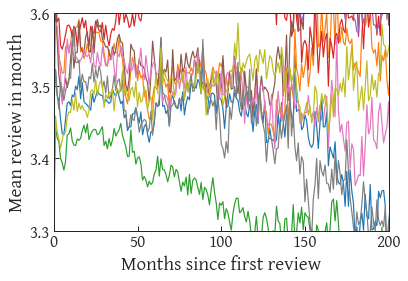

In [260]:
genres_to_plot = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Thriller']

for g in genres_to_plot:
    r = res.where(res.index.get_level_values(0) == g).dropna().values
    plt.plot(r)


plt.xlim(0,200)
plt.ylim(3.3, 3.6)
plt.xlabel('Months since first review')
plt.ylabel('Mean review in month')

In [311]:
res_year = ratings_timesince.groupby(['genres', 'years_since_first_review']).apply(lambda x: np.mean(x['rating']))
res_year_all = ratings_timesince.groupby('years_since_first_review').apply(lambda x: np.mean(x['rating']))

Action  is stationary! 0.004429559714148631
Action  detrended is not stationary!
Adventure  is not stationary! 0.8808949892794711
Adventure  detrended is not stationary!
Comedy  is not stationary! 0.33942551342301247
Comedy  detrended is not stationary!
Crime  is stationary! 1.0608135768469376e-08
Crime  detrended is not stationary!
Drama  is not stationary! 0.6970267298573568
Drama  detrended is not stationary!
Fantasy  is not stationary! 0.22298081931120267
Fantasy  detrended is not stationary!
Romance  is not stationary! 1.0
Romance  detrended is not stationary!
Sci-Fi  is not stationary! 0.9961090495587482
Sci-Fi  detrended is not stationary!
Thriller  is not stationary! 0.04684955499979748
Thriller  detrended is not stationary!
Total is not stationary 0.9774240194436807


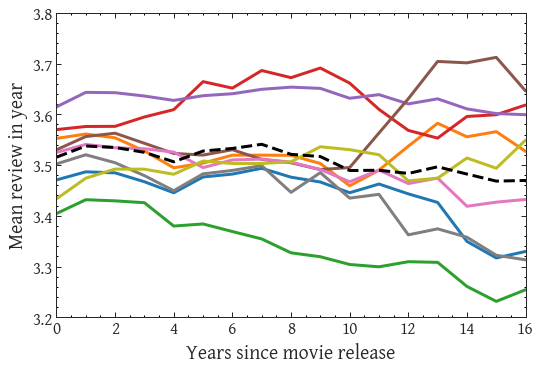

In [344]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

genres_to_plot = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Thriller']

fig = plt.figure(figsize=(7.5, 5.25))

for g in genres_to_plot:
    r = res_year.where(res_year.index.get_level_values(0) == g).dropna().values
    plt.plot(r[:17], label=g, lw=3)
    af = adfuller(r[:17])[1]
    afd = adfuller(detrend(r[:17], order=1, axis=0))[1]
    if(af < 0.01):
        print(g, " is stationary!", af)
    else:
        print(g, " is not stationary!", af)
    if(afd < 0.01):
        print(g, " detrended is stationary!")
    else:
        print(g, " detrended is not stationary!")

p = adfuller(res_year_all[:17])[1]
if(p < 0.05):
    print("Total is stationary", p)
else:
    print("Total is not stationary", p)

plt.plot(res_year_all, lw=3, color='k', linestyle='dashed')
plt.xlim(0,16)
plt.ylim(3.2, 3.8)
plt.xlabel('Years since movie release', fontsize=20)
plt.ylabel('Mean review in year', fontsize=20)
#plt.legend(frameon=False, bbox_to_anchor=(0, 1), loc='upper left')

ax = plt.gca()

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.tight_layout()
plt.savefig('mvy.eps')


# Would be nice to know how many movies are included in each bin
# since this will be a monotonically decreasing number as "years since first review" increases

In [303]:
adfuller(res)[1]

1.1248796481702662e-09

In [213]:

print(adfuller(res))
print(adfuller(detrend(res, order=1, axis=0)))

(2.037038185886117, 0.9987191876197892, 15, 215, {'1%': -3.461136478222043, '5%': -2.875078880098608, '10%': -2.5739861168199027}, -757.5367204104718)
(1.742264466956332, 0.9982273628840436, 15, 215, {'1%': -3.461136478222043, '5%': -2.875078880098608, '10%': -2.5739861168199027}, -756.348585883424)


In [326]:
osc = pd.read_csv('../YZ/Comp_change.csv')
no_osc = pd.read_csv('../YZ/Ex_comp_change.csv')

In [332]:
osc

,Unnamed: 0,movieId,prev_mean,prev_var,after_mean,after_var,mean_diff,var_diff
0,0,57640,3.420609,0.798668,3.375468,0.825457,-0.045141,0.026789
1,1,57669,3.893915,0.570662,3.886914,0.678534,-0.007002,0.107872
2,2,58559,4.282145,0.563397,4.225776,0.558183,-0.056368,-0.005214
3,3,59118,3.473597,0.848638,3.414815,1.072913,-0.058783,0.224275
4,4,59315,3.965975,0.566402,3.845400,0.647027,-0.120576,0.080626
...,...,...,...,...,...,...,...,...
417,417,190947,2.875000,1.625000,NaN,NaN,NaN,NaN
418,418,192045,0.500000,0.000000,NaN,NaN,NaN,NaN
419,419,192109,0.500000,0.000000,NaN,NaN,NaN,NaN
420,420,192385,5.000000,0.000000,NaN,NaN,NaN,NaN


In [330]:
osc['mean_diff'].mean()

-0.010496656015839876

In [333]:
osc['var_diff'].mean()

0.039791188804910234

In [331]:
no_osc['mean_diff'].mean()

0.02724193323366399

In [334]:
no_osc['var_diff'].mean()

0.010848843842688834

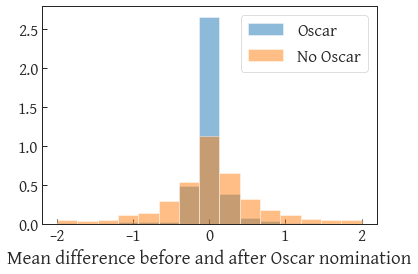

In [340]:
plt.hist(osc['mean_diff'], density='normed', bins=15, range=(-2,2), alpha=0.5, label='Oscar')
plt.hist(no_osc['mean_diff'], density='normed', range=(-2,2), bins=15, alpha=0.5, label='No Oscar')
plt.xlabel(r'Mean difference before and after Oscar nomination')
plt.legend()

## Heatmap of correlation between genre monthly time series (mean and std)

In [257]:
mean_ratings_yearmonth = pd.read_csv('../DL/mean_ratings_yearmonth.csv')
std_ratings_yearmonth = pd.read_csv('../DL/std_ratings_yearmonth.csv')

In [258]:
mean_ratings_yearmonth = pd.pivot_table(mean_ratings_yearmonth, values='rating', index=['rating_date'], columns=['genres'])
std_ratings_yearmonth = pd.pivot_table(std_ratings_yearmonth, values='rating_std', index=['rating_date'], columns=['genres'])

In [259]:
import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

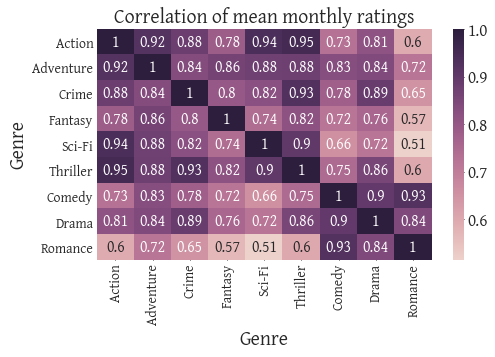

In [272]:
plt.figure(figsize=(7.5, 4.25))
sns.heatmap(cluster_corr(mean_ratings_yearmonth.corr()), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws={"fontsize":16}) #sns.cubehelix_palette(as_cmap=True))#, square=True)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.xlabel(r'Genre', fontsize=20)
plt.ylabel(r'Genre', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'Correlation of mean monthly ratings', fontsize=20)
plt.savefig('hm.eps', bbox_inches='tight')

Text(0.5, 1, 'Correlation of monthly rating std. dev.')

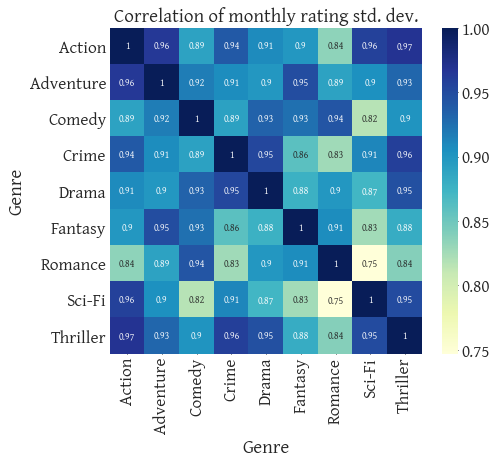

In [367]:
plt.figure(figsize=(7,6))
sns.heatmap(std_ratings_yearmonth.corr(), annot=True, cmap="YlGnBu")#, square=True)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.xlabel(r'Genre')
plt.ylabel(r'Genre')
plt.title(r'Correlation of monthly rating std. dev.')

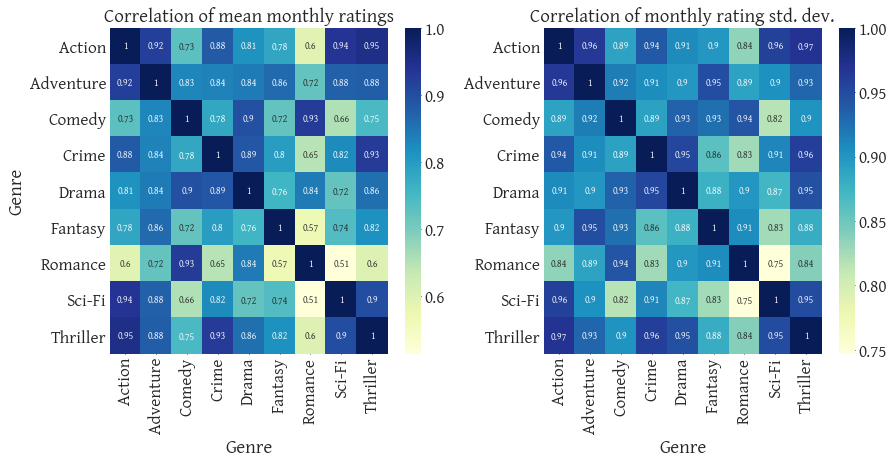

<Figure size 504x432 with 0 Axes>

In [381]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,6), gridspec_kw={'wspace':0.25})

sns.heatmap(mean_ratings_yearmonth.corr(), annot=True, cmap="YlGnBu", ax = ax[0])
b, t = ax[0].set_ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
ax[0].set_ylim(b, t) # update the ylim(bottom, top) values
ax[0].set_xlabel(r'Genre')
ax[0].set_ylabel(r'Genre')
ax[0].set_title(r'Correlation of mean monthly ratings')

plt.figure(figsize=(7,6))
sns.heatmap(std_ratings_yearmonth.corr(), annot=True, cmap="YlGnBu", ax = ax[1])
b, t = ax[1].set_ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
ax[1].set_ylim(b, t) # update the ylim(bottom, top) values
ax[1].set_xlabel(r'Genre')
ax[1].set_ylabel(r'')
ax[1].set_title(r'Correlation of monthly rating std. dev.')

plt.tight_layout()
plt.savefig('hm.eps')

## Before/after box plots

In [71]:
#no_osc = pd.read_csv('New_Ex_Comp_change_updated_0919afternoon.csv')
#osc = pd.read_csv('New_Comp_change_updated_0919afternoon.csv')

no_osc = pd.read_csv('New_Ex_Comp_change3_genres.csv')
osc = pd.read_csv('New_Comp_change3_genres.csv')


no_osc = no_osc.set_index('movieId')
osc = osc.set_index('movieId')

In [73]:
print(np.mean(osc['mean_diff'].dropna()))
print(np.mean(no_osc['mean_diff'].dropna()))

-0.04057964268710241
-0.001116240554549825


In [74]:
print(np.mean(osc['var_diff'].dropna()))
print(np.mean(no_osc['var_diff'].dropna()))

# Oscars lose star rating
# slightly positive increase in variance

# To be updated once Youyuan sends results

-0.00784075535244481
-0.024758834106409836


In [75]:
osc

,Unnamed: 0,prev_mean,prev_var,after_mean,after_var,mean_diff,var_diff,is_Action,is_Adventure,is_Comedy,is_Crime,is_Drama,is_Fantasy,is_Romance,is_Sci-Fi,is_Thriller
movieId,,,,,,,,,,,,,,,,
1,0,4.119812,0.788317,3.868780,0.813068,-0.251032,0.024751,0,1,1,0,0,1,0,0,0
7,1,3.566544,0.763448,3.441460,0.772875,-0.125084,0.009427,0,0,1,0,0,0,1,0,0
11,2,3.796284,0.766248,3.768780,0.699415,-0.027503,-0.066833,0,0,1,0,1,0,1,0,0
14,3,3.505249,0.909163,3.399472,0.862359,-0.105777,-0.046804,0,0,0,0,1,0,0,0,0
16,4,3.687648,0.810705,3.688385,0.776517,0.000737,-0.034188,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190947,855,2.875000,1.625000,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0
192045,856,0.500000,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,1,0,1,0,0
192109,857,0.500000,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0


In [76]:
no_osc

,Unnamed: 0,prev_mean,prev_var,after_mean,after_var,mean_diff,var_diff,is_Action,is_Adventure,is_Comedy,is_Crime,is_Drama,is_Fantasy,is_Romance,is_Sci-Fi,is_Thriller
movieId,,,,,,,,,,,,,,,,
2,0,3.574058,0.784919,3.462277,0.735182,-0.111781,-0.049737,0,1,0,0,0,1,0,0,0
3,1,3.424380,0.917275,3.334128,0.861559,-0.090252,-0.055716,0,0,1,0,0,0,1,0,0
4,2,3.049120,1.248503,3.051429,0.888144,0.002308,-0.360358,0,0,1,0,1,0,1,0,0
5,3,3.345094,0.839547,3.147780,0.748510,-0.197314,-0.091037,0,0,1,0,0,0,0,0,0
6,4,3.814858,0.805862,3.684385,0.840777,-0.130473,0.034914,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171869,5299,2.923077,1.243590,3.083333,2.128788,0.160256,0.885198,0,0,0,0,0,0,0,1,0
172743,5300,2.600000,0.988889,3.666667,0.557971,1.066667,-0.430918,0,0,0,0,0,0,0,0,0
174395,5301,3.270270,1.480480,3.285714,0.875000,0.015444,-0.605480,0,0,0,0,0,0,0,0,1


In [77]:
no_osc['mean_diff_no'] = no_osc['mean_diff']
no_osc['var_diff_no'] = no_osc['var_diff']
no_osc['osc'] = 'No'
osc['osc'] = 'Yes'
osc['mean_diff_yes'] = osc['mean_diff']
osc['var_diff_yes'] = osc['var_diff']

total = pd.concat((osc,no_osc),axis=0)

/home/sbg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [78]:
# Make a dictionary with key genre and value mask of only movies with is_genre == 1
msks = dict()
for genre in ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Thriller']:
    msks[genre] = total.loc[:,'is_'+genre] == 1

In [81]:
# Not sure what the NaNs are from...
total

,Unnamed: 0,after_mean,after_var,is_Action,is_Adventure,is_Comedy,is_Crime,is_Drama,is_Fantasy,is_Romance,...,is_Thriller,mean_diff,mean_diff_no,mean_diff_yes,osc,prev_mean,prev_var,var_diff,var_diff_no,var_diff_yes
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,3.868780,0.813068,0,1,1,0,0,1,0,...,0,-0.251032,NaN,-0.251032,Yes,4.119812,0.788317,0.024751,NaN,0.024751
7,1,3.441460,0.772875,0,0,1,0,0,0,1,...,0,-0.125084,NaN,-0.125084,Yes,3.566544,0.763448,0.009427,NaN,0.009427
11,2,3.768780,0.699415,0,0,1,0,1,0,1,...,0,-0.027503,NaN,-0.027503,Yes,3.796284,0.766248,-0.066833,NaN,-0.066833
14,3,3.399472,0.862359,0,0,0,0,1,0,0,...,0,-0.105777,NaN,-0.105777,Yes,3.505249,0.909163,-0.046804,NaN,-0.046804
16,4,3.688385,0.776517,0,0,0,1,1,0,0,...,0,0.000737,NaN,0.000737,Yes,3.687648,0.810705,-0.034188,NaN,-0.034188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171869,5299,3.083333,2.128788,0,0,0,0,0,0,0,...,0,0.160256,0.160256,NaN,No,2.923077,1.243590,0.885198,0.885198,NaN
172743,5300,3.666667,0.557971,0,0,0,0,0,0,0,...,0,1.066667,1.066667,NaN,No,2.600000,0.988889,-0.430918,-0.430918,NaN
174395,5301,3.285714,0.875000,0,0,0,0,0,0,0,...,1,0.015444,0.015444,NaN,No,3.270270,1.480480,-0.605480,-0.605480,NaN


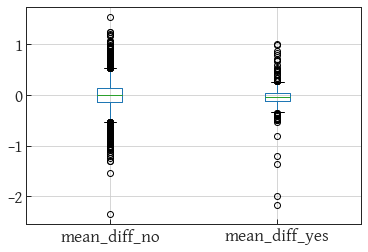

In [82]:
total.boxplot(column=['mean_diff_no', 'mean_diff_yes'])

In [83]:
from mlxtend.evaluate import permutation_test

In [84]:
p_value = permutation_test(osc['mean_diff'].dropna().values, no_osc['mean_diff'].dropna().values,
                          method='approximate', num_rounds=100000, seed=0)
print(p_value)

5e-05


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


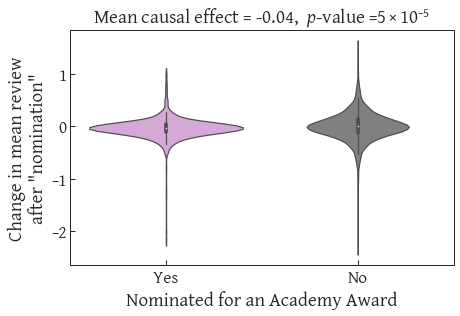

In [85]:
effect = np.mean(osc['mean_diff'].dropna()) - np.mean(no_osc['mean_diff'].dropna())

fig = plt.figure(figsize=(6.5,4.5))
sns.violinplot(data=total, x='osc', y='mean_diff', palette=['plum', 'gray'])
plt.title(r'Mean causal effect = %.2f,  $p$-value =$5\times 10^{-5}$' % (effect))
plt.ylabel('Change in mean review\nafter "nomination"')
plt.xlabel(r'Nominated for an Academy Award')

plt.tight_layout()
plt.savefig('mc.eps')

In [86]:
p_value = permutation_test(osc['var_diff'].dropna().values, no_osc['var_diff'].dropna().values,
                          method='approximate', num_rounds=100000, seed=0)
print(p_value)

0.21239


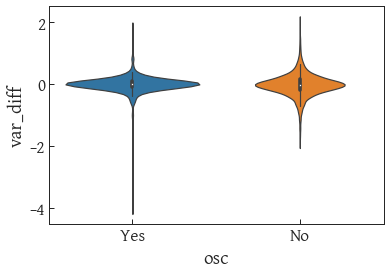

In [87]:
sns.violinplot(data=total, x='osc', y='var_diff')

In [115]:
# Let's now do the same analysis as a function of genre:
pvs = []
p_value = permutation_test(osc['mean_diff'].dropna().values, no_osc['mean_diff'].dropna().values,
                          method='approximate', num_rounds=100000, seed=0)
pvs.append(p_value)
efs = []
effect = np.mean(osc['mean_diff'].dropna()) - np.mean(no_osc['mean_diff'].dropna())
efs.append(effect)

for genre in ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Thriller']:
    p_value = permutation_test(osc.where(osc.loc[:,'is_'+genre] == 1)['mean_diff'].dropna().values, no_osc.where(no_osc.loc[:,'is_'+genre] == 1)['mean_diff'].dropna().values,
                          method='approximate', num_rounds=100000, seed=0)
    effect = np.mean(osc.where(osc.loc[:,'is_'+genre] == 1)['mean_diff'].dropna())-np.mean(no_osc.where(no_osc.loc[:,'is_'+genre] == 1)['mean_diff'].dropna())
    pvs.append(p_value)
    efs.append(effect)
    print(genre, p_value, effect)

Action 0.07676 -0.03687697737112727
Adventure 0.12188 -0.030280363123221445
Comedy 0.00519 -0.05719345017440289
Crime 0.15325 -0.0381386779085251
Drama 0.00029 -0.04432984853278992
Fantasy 0.39251 -0.02421807978170898
Romance 0.00174 -0.0676033312595115
Sci-Fi 0.23705 -0.03469138991634364
Thriller 0.0694 -0.040388906396746846


In [161]:
# Full violin plot

total_osc = osc.copy().reindex()
total_no_osc = no_osc.copy().reindex()

total_osc['genre'] = 'All'+ '\nCE=%.3f\n$p$=%.1E*' % (efs[0],pvs[0])
print(len(total_osc))
total_no_osc['genre'] = 'All'+ '\nCE=%.3f\n$p$=%.1E*' % (efs[0],pvs[0])

tt = len(total_osc)
for i,genre in enumerate(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Thriller']):
    if(genre in ['Comedy', 'Drama', 'Romance']):
        es = '*'
    else:
        es = ''
    tmp = total_osc[total_osc['is_'+genre] == 1]
    tt += len(tmp)
    tmp['genre'] = genre + '\n%.3f\n%.1E' % (efs[i+1],pvs[i+1]) + es
    total_osc = total_osc.append(tmp, ignore_index=True)
    
    tmp = total_no_osc[total_no_osc['is_'+genre] == 1]
    tmp['genre'] = genre + '\n%.3f\n%.1E' % (efs[i+1],pvs[i+1]) + es
    total_no_osc = total_no_osc.append(tmp, ignore_index=True)
    
print(tt, len(total_osc)) # should be the same

# need the data to exist for each genre

860
3996 3996


/home/sbg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sbg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/home/sbg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


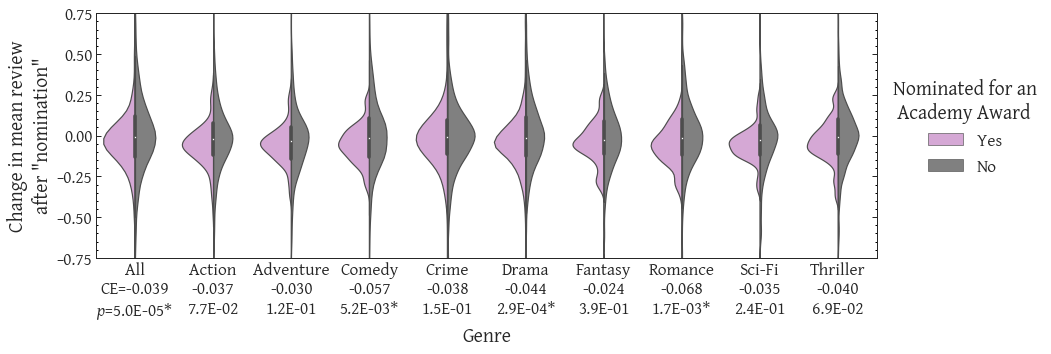

In [173]:
#no_osc['mean_diff_no'] = no_osc['mean_diff']
#no_osc['var_diff_no'] = no_osc['var_diff']
total_no_osc['osc'] = 'No'
total_osc['osc'] = 'Yes'
#osc['mean_diff_yes'] = osc['mean_diff']
#osc['var_diff_yes'] = osc['var_diff']

total_total = pd.concat((total_osc,total_no_osc),axis=0)

cols = sns.color_palette()


fig = plt.figure(figsize=(14,4.5))
ax = sns.violinplot(data=total_total, x='genre', y='mean_diff', hue='osc', split=True, palette=['plum', 'gray'])
plt.ylabel('Change in mean review\nafter "nomination"', fontsize=20)
plt.xlabel(r'Genre', fontsize=20)
ax.legend(frameon=False, title='Nominated for an\n Academy Award', title_fontsize=20, bbox_to_anchor=(1.0, 0.8))
plt.ylim(-0.75, 0.75)

ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('mc.eps', bbox_inches='tight')

## Time density binned by genre

In [462]:
movie_ratings

,userId,movieId,rating,timestamp,rating_date,rating_year,year,genres
0,1,307,3.5,2009-10-27 21:00:21,2009-10,2009,1993,Drama
1,6,307,4.0,1996-05-14 07:34:08,1996-05,1996,1993,Drama
2,56,307,4.0,2013-11-05 04:28:48,2013-11,2013,1993,Drama
3,71,307,5.0,2009-11-09 19:36:54,2009-11,2009,1993,Drama
4,84,307,3.0,2001-08-29 03:25:19,2001-08,2001,1993,Drama
...,...,...,...,...,...,...,...,...
75198271,282403,167894,1.0,2018-04-20 17:04:45,2018-04,2018,1994,Action
75198272,282732,161572,3.5,2017-09-03 03:07:50,2017-09,2017,1976,Drama
75198273,283000,117857,3.5,2014-11-30 03:26:09,2014-11,2014,2014,Documentary
75198274,283000,133409,3.5,2015-05-13 17:48:51,2015-05,2015,1986,(no genres listed)


In [15]:
# Loop over years
# For each year, determine the total number of reviews as the thing to normalize
# Loop over genres and determine the number

ratings_per_year = movie_ratings.groupby('rating_year').count()['movieId']

In [16]:
ratings_per_year.head()

rating_year
1995         10
1996    4703970
1997    1968786
1998     855473
1999    3137248
Name: movieId, dtype: int64

In [17]:
ratings_per_year_by_genre = movie_ratings.groupby(['rating_year','genres']).count()['movieId']

In [18]:
ratings_per_year_by_genre.head()

rating_year  genres 
1995         Comedy     2
             Crime      2
             Drama      1
             Fantasy    1
             Mystery    1
Name: movieId, dtype: int64

In [40]:
ts = ratings_per_year_by_genre / ratings_per_year
ts = ts.swaplevel()

In [41]:
ts = ts[ts.index.get_level_values(0).isin(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Thriller'])]

In [44]:
ts.reset_index()

,genres,rating_year,movieId
0,Comedy,1995,0.200000
1,Crime,1995,0.200000
2,Drama,1995,0.100000
3,Fantasy,1995,0.100000
4,Romance,1995,0.100000
...,...,...,...
208,Drama,2018,0.147802
209,Fantasy,2018,0.047666
210,Romance,2018,0.051973
211,Sci-Fi,2018,0.076848


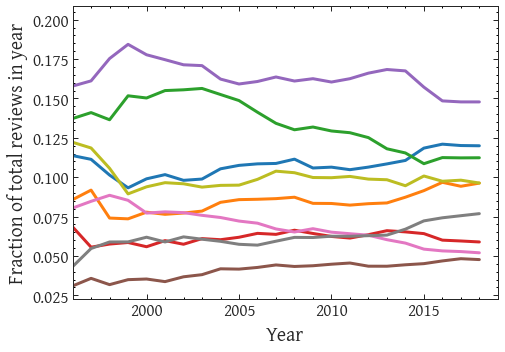

In [70]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig = plt.figure(figsize=(7,5))
ax = plt.gca()

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

for genre in ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Thriller']:
    d = ts.reset_index()
    d = d[d['genres'] == genre].sort_values('rating_year')
    plt.plot(d['rating_year'].astype(int), d['movieId'], lw=3, label=genre)
    
plt.xlim(1996,2019)
plt.xlabel(r'Year', fontsize=20)
plt.ylabel(r'Fraction of total reviews in year', fontsize=20)
plt.tight_layout()
#plt.legend()
plt.savefig('fpy.eps')

## Simple bar plot for LR models

In [213]:
bp = pd.DataFrame([0.70, 0.71, 0.83], index=['Model 1', 'Model 2', 'Model 3'], columns=['Recall']).reset_index()

In [214]:
bp

,index,Recall
0,Model 1,0.70
1,Model 2,0.71
2,Model 3,0.83


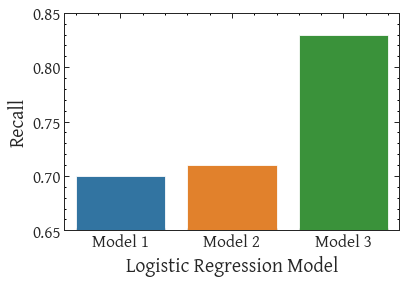

In [221]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

sns.barplot(data=bp, x='index', y='Recall')

ax.set_xlabel(r'Logistic Regression Model', fontsize=20)
ax.set_ylabel(r'Recall', fontsize=20)
ax.set_ylim(0.65, 0.85)

plt.savefig('bp_rec.eps', bbox_inches='tight')

Text(0.5, 0, 'Regression Coefficient')

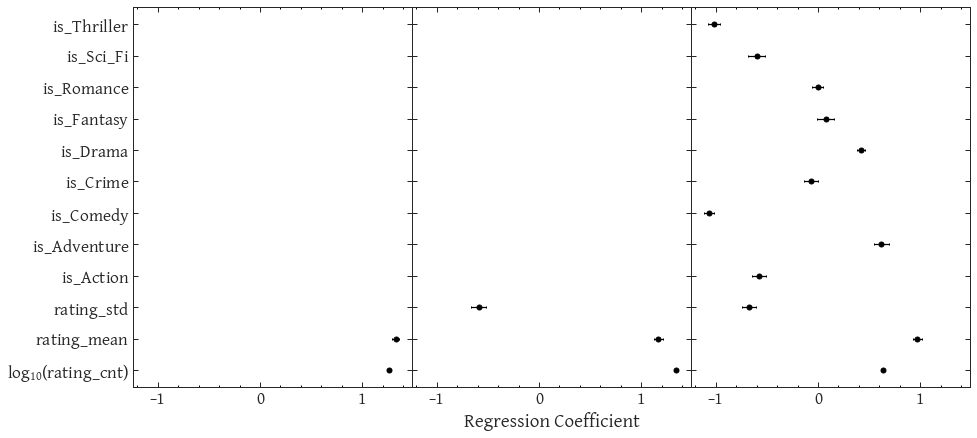

In [241]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,7), sharex = True, sharey=True, gridspec_kw={'wspace':0.} )
for j in range(0,3):
    ax[j].yaxis.set_ticks_position('both')
    ax[j].xaxis.set_ticks_position('both')
    ax[j].tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
    ax[j].xaxis.set_minor_locator(AutoMinorLocator())
        
# y-values will be 0 through 10

m1_list = [1.2600, 1.3265] #Intercept: -6.8011
m1_std  = [0.019, 0.037] #Intercept: 0.136

m2_list = [1.341, 1.168, -0.591] # Intercept: -5.897
m2_std  = [0.022, 0.041, 0.069] # Intercept: 0.167

m3_list = [0.635, 0.972, -0.674, -0.578, 0.621, -1.069, -0.071, 0.422, 0.077, -0.004, -0.599, -1.015] # Intercept: -5.220
m3_std  = [0.011, 0.042, 0.070, 0.066, 0.070, 0.048, 0.067, 0.040, 0.083, 0.055, 0.085, 0.058] # Intercept: 0.172

ax[0].errorbar(m1_list, range(0,2), xerr=m1_std, fmt='.', color='k', markersize=10, capsize=1)
ax[1].errorbar(m2_list, range(0,3), xerr=m2_std, fmt='.', color='k', markersize=10, capsize=1)
ax[2].errorbar(m3_list, range(0,12), xerr=m3_std, fmt='.', color='k', markersize=10, capsize=1)

ax[0].set_yticks(range(0,12))
ax[0].set_yticklabels([r'$\log_{10}(\mathbf{rating}\_\mathbf{cnt})$',
                                      r'$\mathbf{rating}\_\mathbf{mean}$',
                                      r'$\mathbf{rating}\_\mathbf{std}$',
                                      r'$\mathbf{is}\_\mathbf{Action}$',
                                      r'$\mathbf{is}\_\mathbf{Adventure}$',
                                      r'$\mathbf{is}\_\mathbf{Comedy}$',
                                      r'$\mathbf{is}\_\mathbf{Crime}$',
                                      r'$\mathbf{is}\_\mathbf{Drama}$',
                                      r'$\mathbf{is}\_\mathbf{Fantasy}$',
                                      r'$\mathbf{is}\_\mathbf{Romance}$',
                                      r'$\mathbf{is}\_\mathbf{Sci\_Fi}$',
                                      r'$\mathbf{is}\_\mathbf{Thriller}$'])

ax[1].set_xlabel(r'Regression Coefficient')

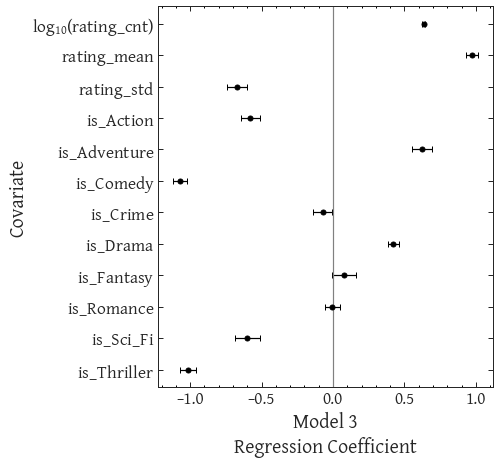

In [253]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig = plt.figure(figsize=(6,7))
ax = plt.gca()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
        
m3_list = [0.635, 0.972, -0.674, -0.578, 0.621, -1.069, -0.071, 0.422, 0.077, -0.004, -0.599, -1.015] # Intercept: -5.220
m3_std  = [0.011, 0.042, 0.070, 0.066, 0.070, 0.048, 0.067, 0.040, 0.083, 0.055, 0.085, 0.058] # Intercept: 0.172

ax.errorbar(m3_list[::-1], range(0,12), xerr=m3_std[::-1], fmt='.', color='k', markersize=10, capsize=3)

ax.set_yticks(range(0,12))
ax.set_yticklabels([r'$\log_{10}(\mathbf{rating}\_\mathbf{cnt})$',
                                      r'$\mathbf{rating}\_\mathbf{mean}$',
                                      r'$\mathbf{rating}\_\mathbf{std}$',
                                      r'$\mathbf{is}\_\mathbf{Action}$',
                                      r'$\mathbf{is}\_\mathbf{Adventure}$',
                                      r'$\mathbf{is}\_\mathbf{Comedy}$',
                                      r'$\mathbf{is}\_\mathbf{Crime}$',
                                      r'$\mathbf{is}\_\mathbf{Drama}$',
                                      r'$\mathbf{is}\_\mathbf{Fantasy}$',
                                      r'$\mathbf{is}\_\mathbf{Romance}$',
                                      r'$\mathbf{is}\_\mathbf{Sci\_Fi}$',
                                      r'$\mathbf{is}\_\mathbf{Thriller}$'][::-1])

ax.set_xlabel('Model 3\nRegression Coefficient', fontsize=20)
ax.set_ylabel(r'Covariate', fontsize=20)
ax.axvline(0, color='gray')
plt.savefig('m3_reg.eps', bbox_inches='tight')

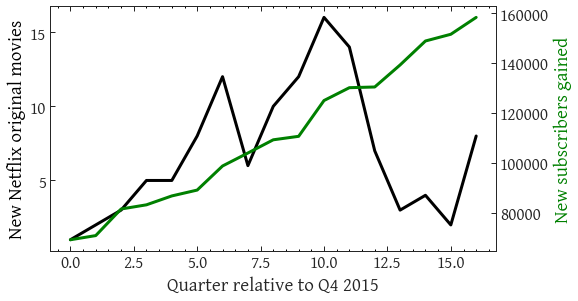

In [292]:
v1 = [1, 2, 3, 5, 5, 8, 12, 6, 10, 12, 16, 14, 7, 3, 4, 2, 8]
v2 = [69168,70839,81500,83177,86743,89090,98748,103952,109248,110644,124995,130141,130422,139259,148863,151562,158334]

fig = plt.figure(figsize=(8,4.5))
ax1 = fig.gca()
ax1.plot(v1, color='k', lw=3)

ax2 = ax1.twinx()

ax2.plot(v2, color='green', lw=3)

ax1.set_xlabel(r'Quarter relative to Q4 2015')
ax1.set_ylabel(r'New Netflix original movies', color='k')
ax2.set_ylabel(r'New subscribers gained', color='green')

ax1.xaxis.set_ticks_position('both')
ax1.tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
ax1.xaxis.set_minor_locator(AutoMinorLocator())

ax2.xaxis.set_ticks_position('both')
ax2.tick_params(axis='both', which='minor', colors='black', width=1.0, length=2.0)
ax2.xaxis.set_minor_locator(AutoMinorLocator())

plt.savefig('nsvo.eps', bbox_inches='tight')